In [25]:
import pandas as pd
import numpy as np
import numpy.linalg as la
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import t

# Parcial 1: Estadística en Analítica
#### Por Alejandro Velásquez Arango

#### Universidad EAFIT

#### 07/05/2022

## Punto 1

In [26]:
df = [
    [-2, 0],
    [-1, 0],
    [0, 1],
    [1, 1],
    [2, 3]
]
df = pd.DataFrame(df, columns="X Y".split())
df

,X,Y
0,-2,0
1,-1,0
2,0,1
3,1,1
4,2,3


In [27]:
lm = smf.ols('Y~X', df)
lm_fit = lm.fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     13.36
Date:                Sat, 07 May 2022   Prob (F-statistic):             0.0354
Time:                        12:04:32   Log-Likelihood:                -3.3094
No. Observations:                   5   AIC:                             10.62
Df Residuals:                       3   BIC:                             9.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000      0.271      3.693      0.0

c:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Con statsmodels, se obtiene el modelo de regresión lineal:

$$
Y = 1 + 0.7X
$$

Los mismos coeficientes se pueden obtener de manera matricial, resolviendo la ecuación

$$
\beta = \left( X^TX\right)^{-1}X^T Y
$$

In [28]:
Y = df.Y
df['Ones'] = 1
X=df[['Ones','X']]
betas = la.inv(X.T @ X) @ (X.T @ Y)
betas

array([1. , 0.7])

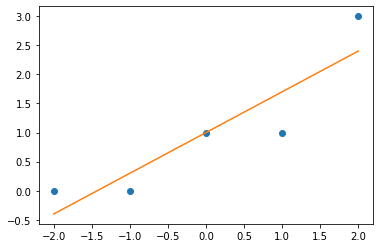

In [29]:
xx= np.linspace(df.X.min(), df.X.max())
yy = 1 + 0.7*xx
fig = plt.plot(df.X, df.Y,'o',xx,yy)

Cuando $X=1$, el valor esperado de $Y$ es 

$$
Y=1 + 0.7(1) = 1.7
$$

In [30]:
SSE = Y.T @ Y - betas.T @ X.T @ Y
n=len(Y)
S2=SSE/(n-2)
S2

0.366666666666666

In [31]:
P = la.inv(X.T @ X)

C_00 = P[0,0]
C_11 = P[1,1]

var_b0 = C_00 * S2
var_b1 = C_11 * S2

Para $X=2$, se tiene $a^T=[1,\: 2]$. El intervalo de confianza de $Y$ viene dado por:

$$
a^T\hat{\beta} \pm t_{\alpha/2}S\sqrt{1 + a^T(X^TX)^{-1}a}
$$

In [32]:
# El 1 del primer valor del vector corresponde al intercepto
a = np.array([1, 2])
P = la.inv(X.T @ X)
var_y = S2 * (1 + a.T @ P @ a)
var_y

0.5866666666666656

In [33]:
# El 1 del primer valor del vector corresponde al intercepto
lower_bound_y = a.T @ betas - t.ppf(0.975, df = len(Y) - len(betas)) * np.sqrt(var_y)
upper_bound_y = a.T @ betas + t.ppf(0.975, df = len(Y) - len(betas)) * np.sqrt(var_y)
lower_bound_y, upper_bound_y

(-0.03756828932652212, 4.837568289326523)

El intervalo de confianza para la predicción de $Y$ con $X=2$ es:
$$
[-0.037, \; 4.837]
$$

## Punto 2

Carga de datos

In [34]:
df = pd.read_csv('../datos/paises.csv')
df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
91,2.4,23,33,65382,73116,111,382,52,1.2,2186,5.7
92,2.2,41,49,17634,12270,11,414,26,1.5,101,0.3
93,4.2,100,29,4044,2159,12,335,8,0.0,206,0.7
94,2.6,109,45,3605,7785,8,186,43,1.1,149,0.3
95,2.8,55,44,5933,7334,14,136,23,0.7,438,1.8


Se calcula primero la matriz de covarianzas y se obtiene su inversa

In [35]:
S = df.cov()
S_inv = la.inv(S)

In [36]:
R2 = 1 - 1/(np.diag(S)*np.diag(S_inv))
print(df.columns)
R2.round(2)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'], dtype='object')


array([0.68, 0.68, 0.64, 0.67, 0.63, 0.82, 0.3 , 0.19, 0.22, 0.87, 0.81])

Calculando el los coeficientes de correlación múltiples y obteniendo $R^2 = 1 - \frac{1}{S^{jj}S_{jj}}$, se puede determinar que la variable que mejor se puede explicar en términos de las otras es $X_{10}$

### PCA

Primero, los datos deben estar estandarizados para se tenga media 0 y desviación 1


Se obitene las autovectores y autovalores de la matriz de covarianza

In [37]:
df_stand = StandardScaler().fit_transform(df)
print(df_stand.mean(axis=0))
print(df_stand.std(axis=0))

[-1.85037171e-16  3.70074342e-17  3.70074342e-17 -2.77555756e-17
 -3.23815049e-17  0.00000000e+00 -9.25185854e-18  7.86407976e-17
  0.00000000e+00  2.77555756e-17  5.55111512e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Ahora se calcula la matriz de covarianza de los datos estandarizados

In [38]:
S = np.cov(df_stand.T)
eig_values, eig_vectors = la.eig(S)
print(eig_values.round(2))
print(eig_vectors.round(2))

[4.07 1.95 1.38 0.07 0.15 0.17 0.33 0.58 0.87 0.8  0.74]
[[ 0.31 -0.35 -0.07 -0.1   0.35  0.52  0.09 -0.16  0.44  0.33 -0.18]
 [ 0.39  0.04 -0.18  0.17 -0.39 -0.29  0.32 -0.64  0.13 -0.08 -0.09]
 [-0.12  0.58  0.17 -0.17  0.43  0.24 -0.05 -0.53 -0.06 -0.19  0.17]
 [-0.3   0.18 -0.53 -0.15  0.35 -0.37  0.45  0.15  0.26  0.14  0.05]
 [-0.26  0.17 -0.61  0.12 -0.34  0.31 -0.5  -0.11  0.17  0.08  0.03]
 [-0.45  0.03  0.15  0.45 -0.21  0.45  0.57  0.   -0.05  0.05  0.02]
 [-0.09 -0.32 -0.37 -0.07  0.21  0.08  0.06 -0.24 -0.74 -0.03 -0.31]
 [-0.01  0.46  0.16 -0.01 -0.09 -0.07 -0.04  0.08 -0.04  0.42 -0.75]
 [ 0.24  0.15 -0.03  0.07 -0.03 -0.02  0.02 -0.01 -0.34  0.73  0.51]
 [-0.42 -0.23  0.21 -0.68 -0.36 -0.04  0.05 -0.27  0.07  0.23  0.06]
 [-0.37 -0.29  0.21  0.47  0.29 -0.38 -0.31 -0.34  0.15  0.24 -0.03]]


In [39]:
print(eig_values[0]/eig_values.sum().round(2))
print(eig_values[1]/eig_values.sum())

0.36621392092378485
0.17545381348370237


Se seleccionan los dos primeros autovalores que son los que tienen mayor valor: $\lambda_1=4.07$ y $\lambda_2=1.95$

In [40]:
new_df = []
for index, row in enumerate(df_stand):
    new_df.append([np.dot(eig_vectors[:,0], row), np.dot(eig_vectors[:,1], row)])
new_df = pd.DataFrame(np.array(new_df), columns="Z1 Z2".split())
new_df.tail()

,Z1,Z2
91,0.165907,0.114074
92,1.366391,1.072347
93,2.599022,-1.350077
94,2.340780,1.230173
95,1.505448,0.447563


In [41]:
new_df.iloc[13]

Z1   -2.465597
Z2    1.024444
Name: 13, dtype: float64

Para el registro $x^{(13)}$, las componentes en el plano de $Z_1$ y $Z_2$ son $(-2.46,\: 1.02)$

Para saber cual es la variable que más aporta en el componente principal $Z_2$, se debe observar el autovector asociado

In [42]:
print(df.columns)
print(eig_vectors[1].round(2))

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'], dtype='object')
[ 0.39  0.04 -0.18  0.17 -0.39 -0.29  0.32 -0.64  0.13 -0.08 -0.09]


La variable que más aporta al componente principal $Z_2$ es $X_8$, con un coeficiente de $-0.64$

Text(0, 0.5, 'Z2')

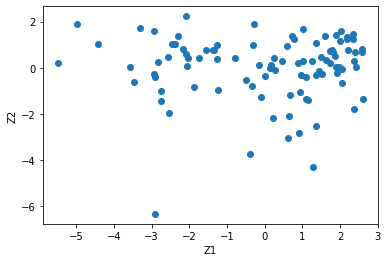

In [43]:
plt.plot(new_df.Z1, new_df.Z2, 'o')
plt.xlabel("Z1")
plt.ylabel("Z2")


A partir de la gráfica, se puede observar un outlier alrededor de $(-3, \: 3)$

## Punto 3

In [44]:
df = [
    [-2, 0, 0],
    [-1, 0, 1],
    [0, 1, 1],
    [1, 1, 0],
    [2, 3, 1]
]
df = pd.DataFrame(df, columns="X1 X2 Y".split())
df

,X1,X2,Y
0,-2,0,0
1,-1,0,1
2,0,1,1
3,1,1,0
4,2,3,1


La función de pérdida de un modelo de regresión logística viene dada por:

$$
L = \frac{1}{m}\sum_i^m\left[-Y^{(i)} \cdot \ln\left[g(X^{(i)}\cdot\beta)\right] - (1 - Y^{(i)}) \left( 1 - \ln\left[g(X^{(i)}\cdot\beta)\right] \right) \right]
$$

donde

$$
g(X\cdot \beta) = \frac{1}{1+e^{-(X\cdot \beta)}} = \frac{1}{1+e^{-(\beta_0+\beta_1X)}}
$$

Ajustemos los datos a un modelo de regresión logística y determinemos la predicción para el punto $(0, \; 2)$

In [45]:
X = df.drop('Y', axis=1)
y = df.Y
lr = sm.Logit(y, X)
lr_fit = lr.fit()

Optimization terminated successfully.
         Current function value: 0.601406
         Iterations 6


In [46]:
print(lr_fit.summary())

                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                    5
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 May 2022   Pseudo R-squ.:                  0.1064
Time:                        12:04:37   Log-Likelihood:                -3.0070
converged:                       True   LL-Null:                       -3.3651
Covariance Type:            nonrobust   LLR p-value:                    0.3974
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.0406      0.855      0.047      0.962      -1.635       1.716
X2             0.6684      1.012      0.660      0.509      -1.315       2.652


In [47]:
a = np.array([0, 2])
betas = lr_fit.params
1 / (1 + np.exp(-(a @ betas)))

0.7919551575395981

Como el valor es mayor a 0.5, se dice que la clase predicha para el punto $(0, \; 2)$ es $1$